# **10 Machine Learning**

In [2]:
!pip3 install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# %matplotlib notebook

## **<span style='color:#EA7500	'>How to Train a Model</span>**
### Step 0: Data Preparation

In [4]:
data = pd.read_csv('housing.csv')

data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200



## **<span style='color:#EA7500	'>Basics of the API</span>**

### Step 1: Choose a Class of Model

In [5]:
from sklearn.linear_model import LinearRegression

### Step 2: Choose Model Hyperparameters

In [6]:
linear_model = LinearRegression(fit_intercept=True)

#y=w0+w1x  ;fit_intercept計算w0

### Step 3: Arrange Data

In [7]:
X = data['RM'].to_numpy()
y = data['MEDV'].to_numpy()
print(X)
X = np.expand_dims(X, axis=1)
print(X)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  5.854 6.101 5.877 6.3

In [8]:
print(y.shape)
print(y)

(489,)
[ 504000  453600  728700  701400  760200  602700  480900  569100  346500
  396900  315000  396900  455700  428400  382200  417900  485100  367500
  424200  382200  285600  411600  319200  304500  327600  291900  348600
  310800  386400  441000  266700  304500  277200  275100  283500  396900
  420000  441000  518700  646800  732900  558600  531300  518700  445200
  405300  420000  348600  302400  407400  413700  430500  525000  491400
  396900  743400  518700  663600  489300  411600  392700  336000  466200
  525000  693000  493500  407400  462000  365400  438900  508200  455700
  478800  491400  506100  449400  420000  436800  445200  426300  588000
  501900  520800  480900  501900  558600  472500  466200  495600  602700
  474600  462000  480900  525000  432600  596400  449400  812700  919800
  697200  577500  556500  390600  405300  422100  409500  409500  428400
  415800  407400  455700  478800  394800  392700  388500  384300  445200
  403200  428400  405300  462000  426300  43

In [9]:
print(X.shape)

(489, 1)


### Step 4: Fit the Model to Your Data

In [10]:
linear_model.fit(X,y)

linear_model.coef_, linear_model.intercept_

(array([179098.59189784]), -663283.9105825216)

### Step 5: Predict Labels for Unknown Data

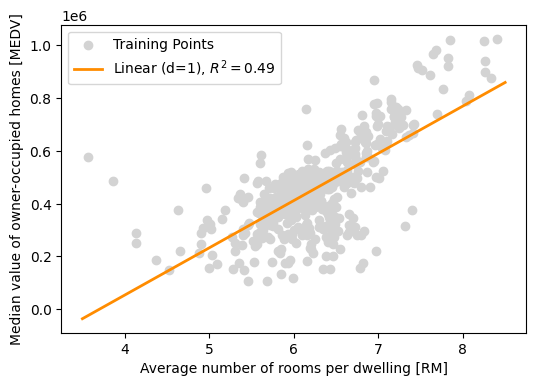

In [11]:
Xfit = np.expand_dims(np.linspace(3.5, 8.5, 11), axis=1)
yfit = linear_model.predict(Xfit)

linear_r2 = linear_model.score(X, y)

# print(yfit)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, c='lightgray', label = 'Training Points')
plt.plot(Xfit, yfit, c='darkorange', lw=2, label='Linear (d=1), $R^2=%.2f$' % linear_r2)
plt.xlabel('Average number of rooms per dwelling [RM]')
plt.ylabel('Median value of owner-occupied homes [MEDV]')
plt.legend()
plt.show()


In [12]:
import numpy as np

# 創建一個一維數組
arr = np.array([1, 2, 3])

# 使用 np.expand_dims 在列的方向上增加一個維度
expanded_arr = np.expand_dims(arr, axis=1)

print("原始數組形狀：", arr.shape)
print("擴展後的數組形狀：", expanded_arr.shape)


原始數組形狀： (3,)
擴展後的數組形狀： (3, 1)



## **<span style='color:#EA7500	'>Mutiple Regression</span>**

In [13]:
X = data.loc[:, 'RM':'LSTAT'].to_numpy()
Y = data['MEDV'].to_numpy()

linear_model.fit(X, Y)

print('coef: \t', linear_model.coef_)
print('inter: \t', linear_model.intercept_)
print('r^2: \t', linear_model.score(X, Y))

coef: 	 [ 95148.09398076 -12466.44430366]
inter: 	 21902.60341948364
r^2: 	 0.6644235495547175


In [33]:
print(X.shape)
print(y.shape)

(489, 1)
(489,)


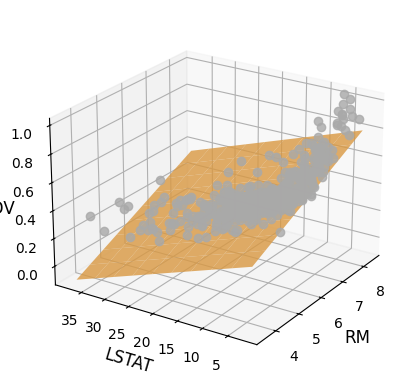

In [14]:
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(x.min(), x.max(), 10)  
y_pred = np.linspace(y.min(), y.max(), 10)


xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
zz_pred = linear_model.predict(np.append(xx_pred.reshape(-1, 1), yy_pred.reshape(-1, 1), axis=1)).reshape(10, 10)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='darkgray', zorder=15, linestyle='none', marker='o', alpha=0.8)
ax.plot_surface(xx_pred, yy_pred, zz_pred, color=(1.0, 0.7, 0.3, 0.8),)
ax.set_xlabel('RM', fontsize=12)
ax.set_ylabel('LSTAT', fontsize=12)
ax.set_zlabel('MEDV', fontsize=12)

ax.view_init(elev=23, azim=-147)

plt.show()

## **<span style='color:#EDA0A9	'>Exercise (10 mins)</span>**
1. Does the number of rooms predicts the price?
2. Increase the number of rooms increase the price? 
3. How does the number of rooms affects the price?
4. Predict the median price of the town with RM=6.976, LSTAT=5.64, and PTRATIO=21.

In [15]:
# Prepare the data
X = data.loc[:, 'RM':'PTRATIO'].to_numpy()
Y = data['MEDV'].to_numpy()

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X, Y)

print('coef: \t', linear_model.coef_)
print('inter: \t', linear_model.intercept_)
print('r^2: \t', linear_model.score(X, Y))
# Xfit = np.expand_dims(np.linspace(3.5, 8.5, 11), axis=1)
# b = linear_model.predict(Xfit)
print(X)

coef: 	 [ 86565.23613299 -10849.34038381 -19492.11563515]
inter: 	 415464.3965167298
r^2: 	 0.7176275212982739
[[ 6.575  4.98  15.3  ]
 [ 6.421  9.14  17.8  ]
 [ 7.185  4.03  17.8  ]
 ...
 [ 6.976  5.64  21.   ]
 [ 6.794  6.48  21.   ]
 [ 6.03   7.88  21.   ]]


In [16]:
# linear_model = LinearRegression(fit_intercept=True)
# X = data['RM'].to_numpy()
# y = data['MEDV'].to_numpy()
# linear_model.fit(X,y)

# linear_model.coef_, linear_model.intercept_
# X = np.expand_dims(X, axis=1)
# print(X)
# type(X)

# Xfit = np.expand_dims(np.linspace(3.5, 8.5, 11), axis=1)
# yfit = linear_model.predict(Xfit)

# linear_r2 = linear_model.score(X, y)


In [17]:
# TODO: fit the data by linear_model

In [18]:
# TODO: Predict the price using the trained model
test_data = np.array([[6.976, 5.64, 21]])
# Xfit = np.expand_dims(np.linspace(3.5, 8.5, 11), axis=1)
# b = linear_model.predict(Xfit)
# print(b)


## **<span style='color:#EA7500	'>Polynomial Regression</span>**

In [19]:
X = data['RM'].to_numpy()
y = data['MEDV'].to_numpy()

X = np.expand_dims(X, axis=1)
print(X)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [20]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
quadratic.fit(X)
X_quad = quadratic.fit_transform(X)



In [21]:
X_quad

array([[ 1.      ,  6.575   , 43.230625],
       [ 1.      ,  6.421   , 41.229241],
       [ 1.      ,  7.185   , 51.624225],
       ...,
       [ 1.      ,  6.976   , 48.664576],
       [ 1.      ,  6.794   , 46.158436],
       [ 1.      ,  6.03    , 36.3609  ]])

In [22]:
print(X_quad.shape)

(489, 3)


In [23]:
polynomial_model = LinearRegression(fit_intercept=True)
polynomial_model.fit(X_quad, y)
quad_r2 = polynomial_model.score(X_quad, y)

print('coef: \t', polynomial_model.coef_)
print('inter: \t', polynomial_model.intercept_)
print('r^2: \t', quad_r2)

coef: 	 [      0.         -569583.52264609   59737.52428958]
inter: 	 1657759.8128358354
r^2: 	 0.5721569504456036


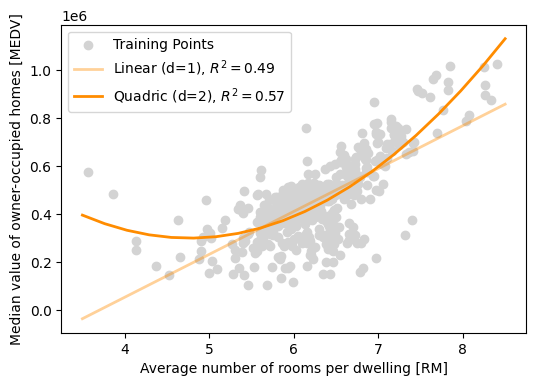

In [24]:
Xfit = np.expand_dims(np.linspace(3.5, 8.5, 20), axis=1)
quadratic_Xfit = quadratic.transform(Xfit)


linear_model.fit(X, y)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, c='lightgray', label = 'Training Points')
plt.plot(Xfit, linear_model.predict(Xfit), c='darkorange', alpha=0.4, lw=2, label='Linear (d=1), $R^2=%.2f$' % linear_r2)
plt.plot(Xfit, polynomial_model.predict(quadratic_Xfit), c='darkorange', lw=2, label='Quadric (d=2), $R^2=%.2f$' % quad_r2)
plt.xlabel('Average number of rooms per dwelling [RM]')
plt.ylabel('Median value of owner-occupied homes [MEDV]')
plt.legend()
plt.show()

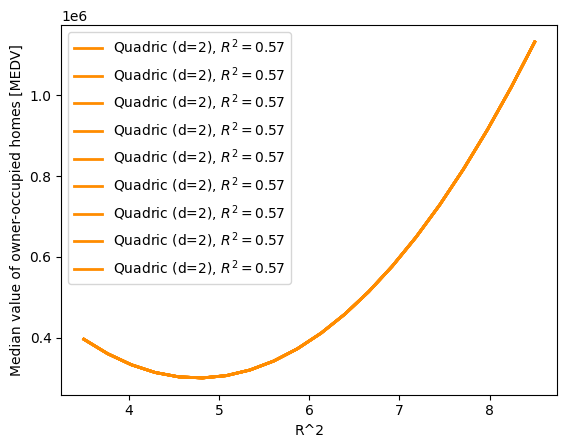

In [25]:
X = data['RM'].to_numpy()
y = data['MEDV'].to_numpy()

X = np.expand_dims(X, axis=1)
for i in np.arange(1,10):
    quadratic = PolynomialFeatures(degree=i)
    quadratic.fit(X)
    X_quad = quadratic.fit_transform(X)
    plt.plot(Xfit, polynomial_model.predict(quadratic_Xfit), c='darkorange', lw=2, label='Quadric (d=2), $R^2=%.2f$' % quad_r2)
    


plt.xlabel('R^2')
plt.ylabel('Median value of owner-occupied homes [MEDV]')
plt.legend()
plt.show()

0.48610069787324506
0.5721569504456036
0.5747985806049742
0.5749894592153921
0.5896864157060412
0.5896943779990627
0.5932280359909861
0.5935322085965473
0.593598248442256


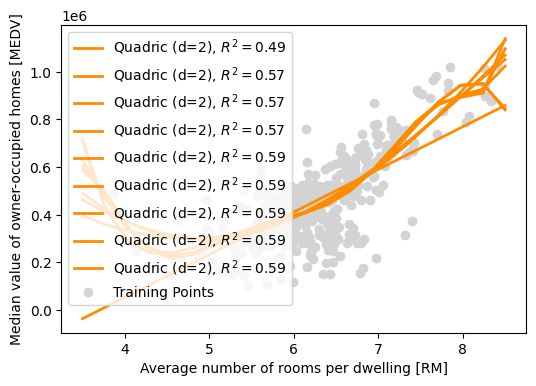

In [26]:
plt.figure(figsize=(6, 4))

for i in np.arange(1,10):
    quadratic = PolynomialFeatures(degree=i)
    quadratic.fit(X)
    X_quad = quadratic.fit_transform(X)
    polynomial_model = LinearRegression(fit_intercept=True)
    polynomial_model.fit(X_quad, y)
    quad_r2 = polynomial_model.score(X_quad, y)
    print(quad_r2)
    Xfit = np.expand_dims(np.linspace(3.5, 8.5, 20), axis=1)
    quadratic_Xfit = quadratic.transform(Xfit)
    # plt.plot(Xfit, linear_model.predict(Xfit), c='darkorange', alpha=0.4, lw=2, label='Linear (d=1), $R^2=%.2f$' % linear_r2)
    plt.plot(Xfit, polynomial_model.predict(quadratic_Xfit), c='darkorange', lw=2, label='Quadric (d=2), $R^2=%.2f$' % quad_r2 )

linear_model.fit(X, y)


    

plt.scatter(X, y, c='lightgray', label = 'Training Points')
# plt.plot(Xfit, linear_model.predict(Xfit), c='darkorange', alpha=0.4, lw=2, label='Linear (d=1), $R^2=%.2f$' % linear_r2)
# plt.plot(Xfit, polynomial_model.predict(quadratic_Xfit), c='darkorange', lw=2, label='Quadric (d=2), $R^2=%.2f$' % quad_r2)
plt.xlabel('Average number of rooms per dwelling [RM]')
plt.ylabel('Median value of owner-occupied homes [MEDV]')
plt.legend()
plt.show()

## **<span style='color:#EA7500	'>Model Validation</span>**

In [27]:
from sklearn.metrics import mean_squared_error

df = pd.read_csv('train.csv')

X_train = np.expand_dims(df['data'].to_numpy(), axis=1)
y_train = df['target'].to_numpy()

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

nd_model = LinearRegression(fit_intercept=True)
nd_model.fit(X_train_poly, y_train)

y_pred = nd_model.predict(X_train_poly)

mse = mean_squared_error(y_train, y_pred)


print('coef: \t', nd_model.coef_)
print('inter: \t', nd_model.intercept_)
print('Mean squared error: ', mean_squared_error(y_train, y_pred))



coef: 	 [  0.         -41.36859783   3.89265819]
inter: 	 64.93228517307496
Mean squared error:  384.77021304788735


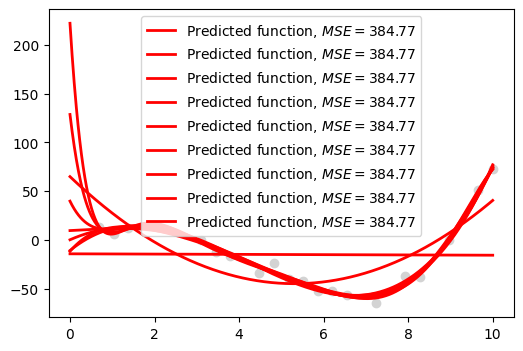

In [28]:
from sklearn.metrics import mean_squared_error
df = pd.read_csv('train.csv')

X_train = np.expand_dims(df['data'].to_numpy(), axis=1)
y_train = df['target'].to_numpy()
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, c='lightgray')

def true_func(x):
    return np.power(x, 3)-12*np.power(x, 2)+27*x
for i in np.arange(1,10):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    nd_model = LinearRegression(fit_intercept=True)
    nd_model.fit(X_train_poly, y_train)
    # y_pred = nd_model.predict(X_train_poly)
    # mse = mean_squared_error(y_train, y_pred)
    Xfit = np.expand_dims(np.linspace(0, 10, 1000), axis=1)
    Xfit_poly = poly.transform(Xfit)
    yfit = nd_model.predict(Xfit_poly)
    true_mse = mean_squared_error(y_train, true_func(X_train))
    plt.plot(Xfit, yfit, c='r', lw=2, label='Predicted function, $MSE=%.2f$' % mse)
plt.legend()
plt.show()
    

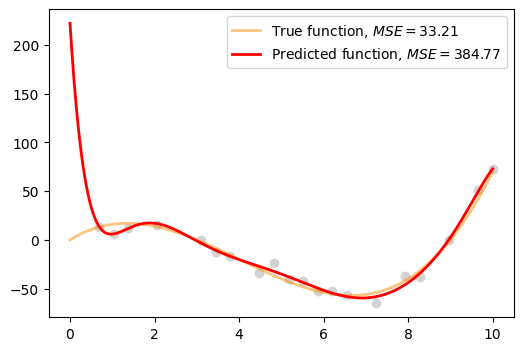

In [29]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, c='lightgray')

Xfit = np.expand_dims(np.linspace(0, 10, 1000), axis=1)
Xfit_poly = poly.transform(Xfit)

yfit = nd_model.predict(Xfit_poly)

def true_func(x):
    return np.power(x, 3)-12*np.power(x, 2)+27*x

true_mse = mean_squared_error(y_train, true_func(X_train))
    

plt.plot(Xfit, true_func(Xfit), c='darkorange', alpha=0.5, lw=2, label='True function, $MSE=%.2f$' % true_mse)
plt.plot(Xfit, yfit, c='r', lw=2, label='Predicted function, $MSE=%.2f$' % mse)
plt.legend()
plt.show()

## **<span style='color:#EDA0A9	'>Exercise (15 mins)</span>**
1. Estimate the target function that generated the data in train.csv by using polynomial regression.
2. Find the order of the polynomial with the lowest MSE.

In [30]:
from sklearn.metrics import mean_squared_error
# from sklearn.cross_validation import train_test_split


# Load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# try to find the function with the lowest MSE
# TODO: nd_model.fit(); nd_model.predict()
